# Panoramica Continenti

Panoramica dati dei continenti.

> Max Pierini

In [1]:
import json
import requests
import datetime as dt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
data = {}

json_url = "https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/json/COVID-AFRICA.json"
_data = pd.read_json(json_url)
data.update({"Africa": _data})

json_url = "https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/json/COVID-ASIA.json"
_data = pd.read_json(json_url)
data.update({"Asia": _data})

json_url = "https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/json/COVID-EUROPE.json"
_data = pd.read_json(json_url)
data.update({"Europe": _data})

json_url = "https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/json/COVID-NORTH_AMERICA.json"
_data = pd.read_json(json_url)
data.update({"North America": _data})

json_url = "https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/json/COVID-SOUTH_AMERICA.json"
_data = pd.read_json(json_url)
data.update({"South America": _data})

json_url = "https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/json/COVID-OCEANIA.json"
_data = pd.read_json(json_url)
data.update({"Oceania": _data})
    
# LOCKDOWNS
_ = """
ld = pd.read_csv(
    "https://raw.githubusercontent.com/maxdevblock/covid-19-time-series/master/csv/lockdowns.csv",
    dtype={"Place": str}
)
ld.fillna('', inplace=True)"""

In [3]:
days = data['Asia'].index

In [4]:
_ = """print(f"FIRST ENTRY DATE: {days[0]}")
print(f"LAST  ENTRY DATE: {days[-1]}")
period = (days[-1] - days[0]).days

print("COVERAGE: {} days".format(period))
print("CURRENT DATE IS: {}".format(dt.datetime.now().strftime("%Y-%m-%d %H:%M:%S")))"""

In [5]:
minC = data["Asia"]['Confirmed'].values[0]
minD = data["Asia"]['Deaths'].values[0]
minR = data["Asia"]['Recovered'].values[0]
minP = minC - minD - minR

***

## TOTAL CASES

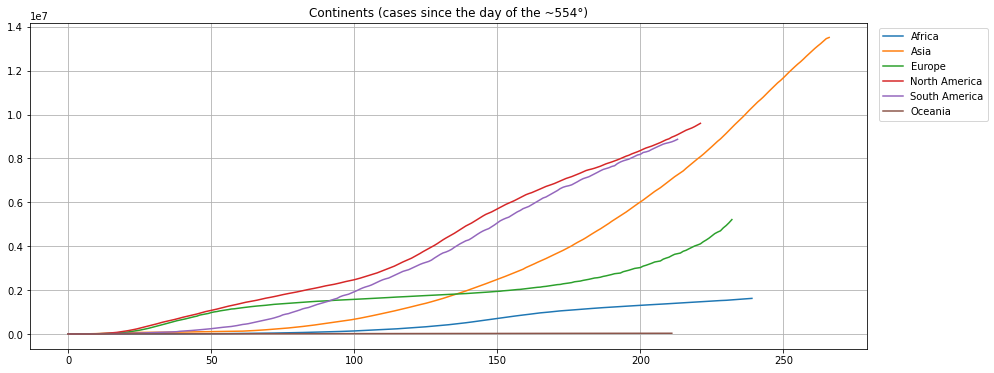

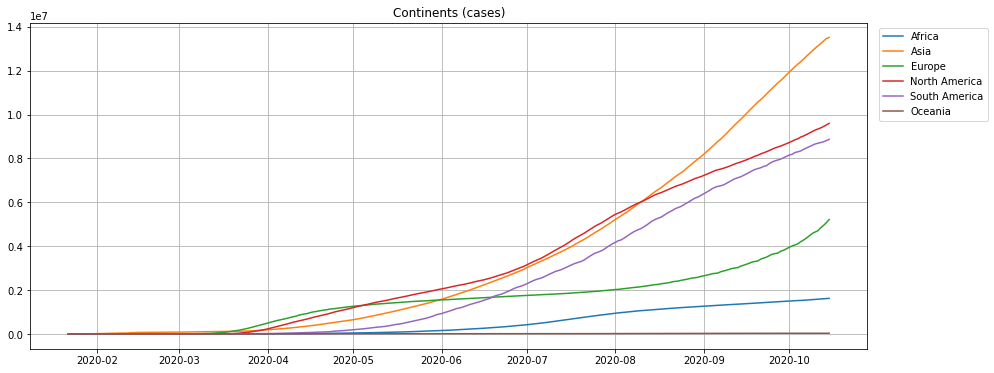

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, continent in enumerate(data):
    try:
        j = (data[continent]['Confirmed'] > minC).values.nonzero()[0][0]
    except Exception as err:
        print("ERROR: {} max={} < min={}".format(continent, max(TOTyC[country]), minC))
        continue
    Y = data[continent]['Confirmed'][j:]
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = [i for i in range(Y.index.size)]
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=continent, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"Continents (cases since the day of the ~{minC:.0f}°)")
fig.set_facecolor('w'); plt.show();

fig, ax = plt.subplots(figsize=(15, 6))

for c, continent in enumerate(data):
    Y = data[continent]['Confirmed']
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = days
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=continent, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"Continents (cases)")
fig.set_facecolor('w'); plt.show();

<hr>

## DEATHS

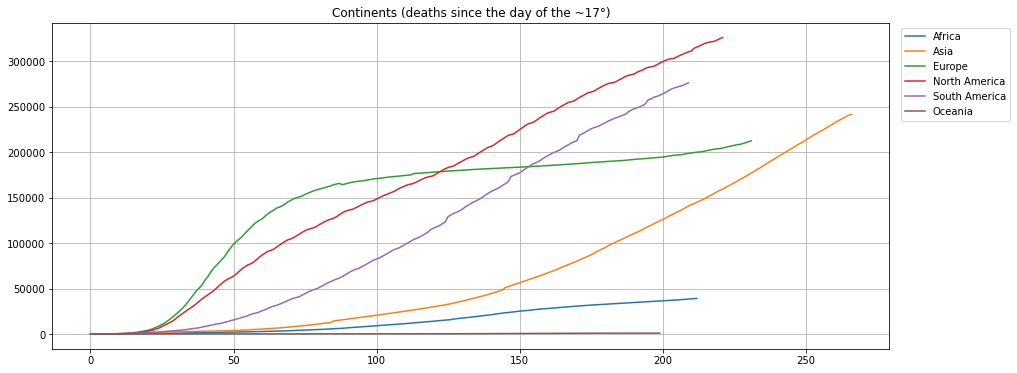

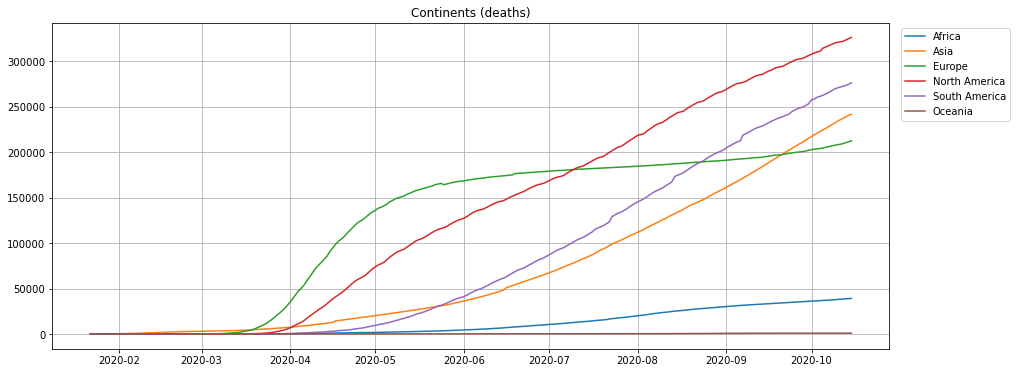

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, continent in enumerate(data):
    try:
        j = (data[continent]['Deaths'] > minD).values.nonzero()[0][0]
    except Exception as err:
        print("ERROR: {} max={} < min={}".format(continent, max(TOTyC[country]), minC))
        continue
    Y = data[continent]['Deaths'][j:]
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = [i for i in range(Y.index.size)]
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=continent, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"Continents (deaths since the day of the ~{minD:.0f}°)")
fig.set_facecolor('w'); plt.show();

fig, ax = plt.subplots(figsize=(15, 6))

for c, continent in enumerate(data):
    Y = data[continent]['Deaths']
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = days
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=continent, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"Continents (deaths)")
fig.set_facecolor('w'); plt.show();

<hr>

## RECOVERED

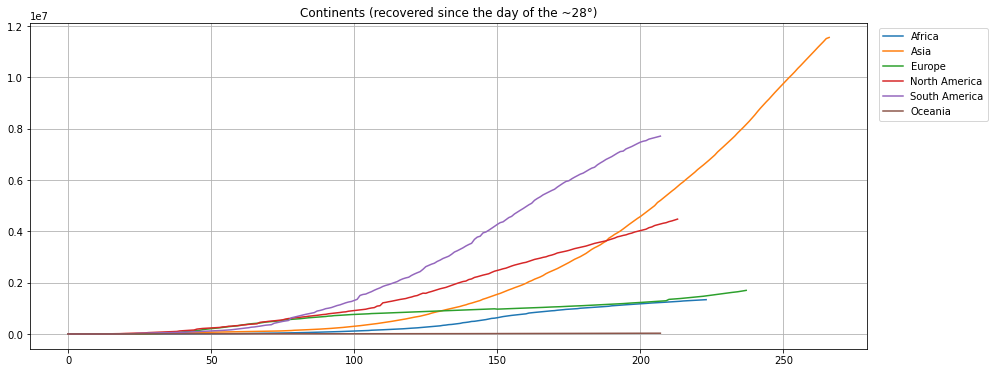

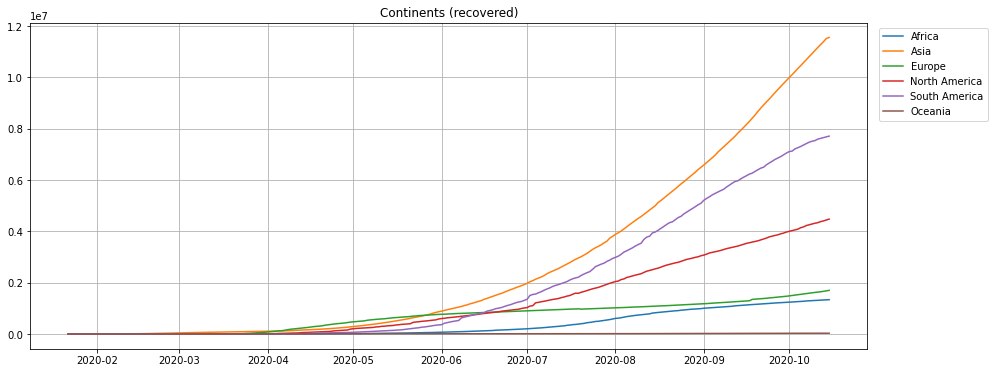

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, continent in enumerate(data):
    try:
        j = (data[continent]['Recovered'] > minR).values.nonzero()[0][0]
    except Exception as err:
        print("ERROR: {} max={} < min={}".format(continent, max(TOTyC[country]), minC))
        continue
    Y = data[continent]['Recovered'][j:]
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = [i for i in range(Y.index.size)]
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=continent, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"Continents (recovered since the day of the ~{minR:.0f}°)")
fig.set_facecolor('w'); plt.show();

fig, ax = plt.subplots(figsize=(15, 6))

for c, continent in enumerate(data):
    Y = data[continent]['Recovered']
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = days
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=continent, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"Continents (recovered)")
fig.set_facecolor('w'); plt.show();

<hr>

## INFECTED

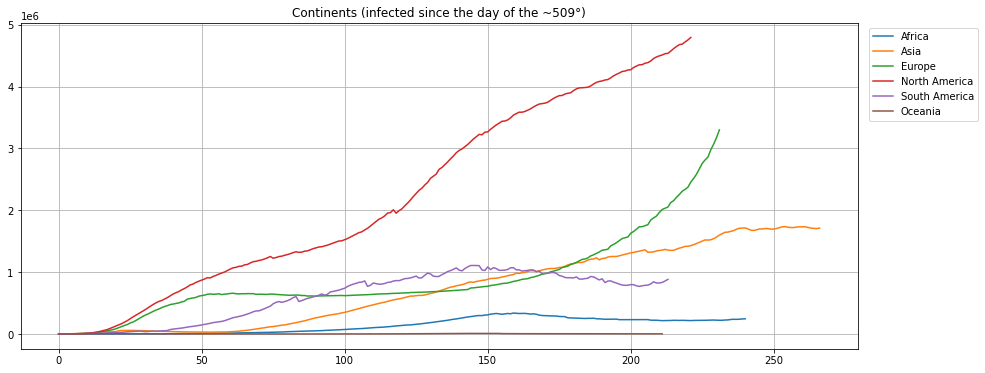

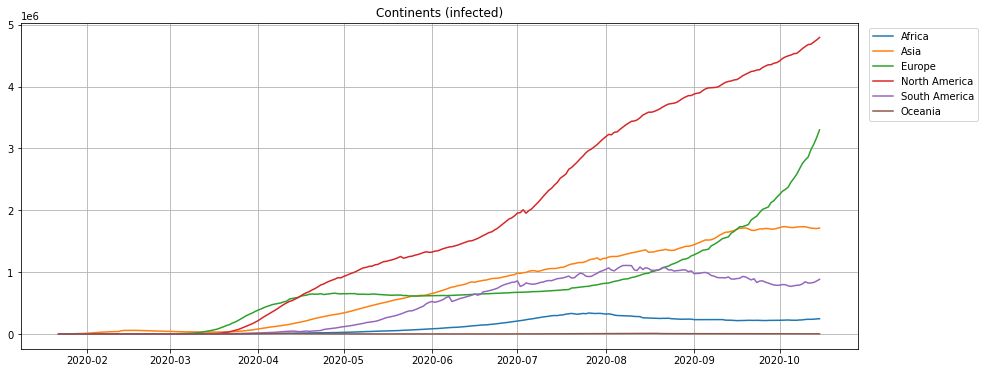

In [9]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, continent in enumerate(data):
    P = data[continent]['Confirmed'] - data[continent]['Deaths'] - data[continent]['Recovered']
    try:
        j = (P > minP).values.nonzero()[0][0]
    except Exception as err:
        print("ERROR: {} max={} < min={}".format(continent, max(TOTyC[country]), minC))
        continue
    Y = P[j:]
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = [i for i in range(Y.index.size)]
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=continent, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"Continents (infected since the day of the ~{minP:.0f}°)")
fig.set_facecolor('w'); plt.show();

fig, ax = plt.subplots(figsize=(15, 6))

for c, continent in enumerate(data):
    P = data[continent]['Confirmed'] - data[continent]['Deaths'] - data[continent]['Recovered']
    Y = P
    if isinstance(Y, pd.DataFrame):
        Y = Y.sum(axis=0)
    X = days
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=continent, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"Continents (infected)")
fig.set_facecolor('w'); plt.show();

<hr>

## CFR (Cases Fatality Rate)

!!! PLEASE NOTE !!!

These rates are only useful for **SIRD** epidemiological model ([read here for details](https://maxpierini.it/R0.pdf)) not to define COVID-19 actual rates.

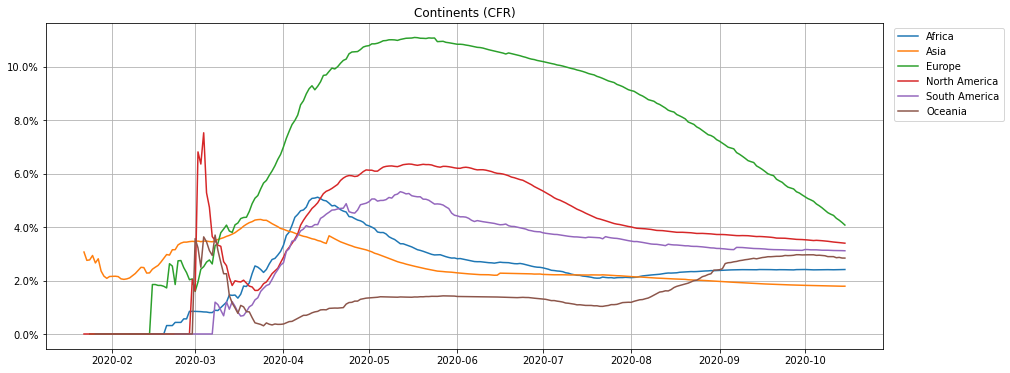

In [10]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, continent in enumerate(data):
    Y = data[continent]['Deaths'] / data[continent]['Confirmed']
    X = days
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=continent, ls=ls
    )
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"Continents (CFR)")
fig.set_facecolor('w'); plt.show();

## RECOVERY RATE

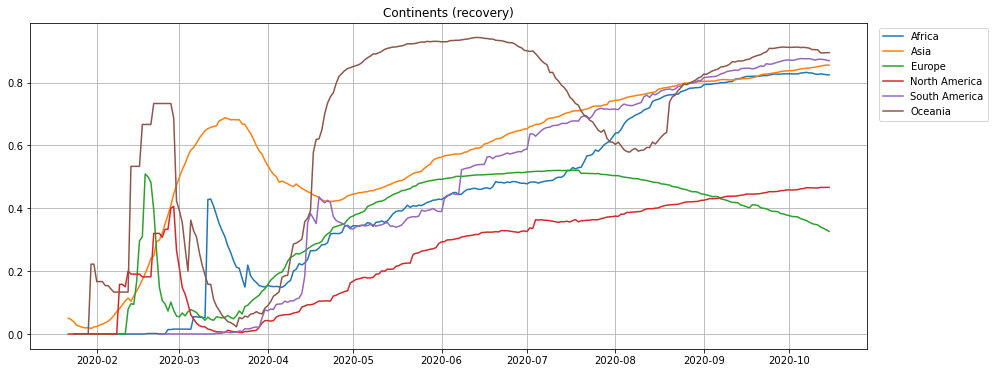

In [11]:
fig, ax = plt.subplots(figsize=(15, 6))

for c, continent in enumerate(data):
    Y = data[continent]['Recovered'] / data[continent]['Confirmed']
    X = days
    ls = '-'
    if c > 10:
        ls = "--"
    ax.plot(
        X, Y,
        label=continent, ls=ls
    )

ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.grid()
ax.set_title(f"Continents (recovery)")
fig.set_facecolor('w'); plt.show();